<a href="https://colab.research.google.com/github/MargaretBU/LAGCC-Data-Analysis/blob/main/Margaret_Burke_Python_Project_2_Public_Health_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SET-UP WORKABLE DATAFRAME**

In [ ]:
import pandas as pd



In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [ ]:
#Display first five rows of df to get an idea of the number/type/contents of columns
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#Get a count of the number of rows in df
df.shape[0]


101766

In [ ]:
#You can also get a count of the number of columns without listing the head of the df
df.shape[1]

50

In [ ]:
#Display a list of all column headers in df
list(df)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [ ]:
#Create a subset of the df with only the paramaters we might want to measure listed and name it df2
df2 = df[['encounter_id','patient_nbr','race','gender','age','weight','number_emergency', 'diag_1', 'diag_2', 'diag_3','number_diagnoses','time_in_hospital','readmitted']]

In [ ]:
#Run df2 to confirm new parameters/columns and get a count of total rows
df2

,encounter_id,patient_nbr,race,gender,age,weight,number_emergency,diag_1,diag_2,diag_3,number_diagnoses,time_in_hospital,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,0,250.83,?,?,1,1,NO
1,149190,55629189,Caucasian,Female,[10-20),?,0,276,250.01,255,9,3,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,0,648,250,V27,6,2,NO
3,500364,82442376,Caucasian,Male,[30-40),?,0,8,250.43,403,7,2,NO
4,16680,42519267,Caucasian,Male,[40-50),?,0,197,157,250,5,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,0,250.13,291,458,9,3,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,0,560,276,787,9,5,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,0,38,590,296,13,1,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,0,996,285,998,9,10,NO


In [ ]:
#Group by unique values of Diagnosis 1 and sort descending to find the most identified diagnosis
Diag1 = df2.groupby(['diag_1'])['patient_nbr'].count().sort_values(ascending=False)

In [ ]:
#428 is Congestive Heart Failure according to ICD9 (as looked up on the internet)
Diag1

diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
832       1
833       1
919       1
834       1
10        1
Name: patient_nbr, Length: 717, dtype: int64

In [ ]:
# Find a column with unique values in order to run groupby functions. 'encounter_id' fits the parameter.
df2['encounter_id'].is_unique

True

In [ ]:
#Sum up total number of null values in df2 by column
df2.isnull().sum()

encounter_id        0
patient_nbr         0
race                0
gender              0
age                 0
weight              0
number_emergency    0
diag_1              0
diag_2              0
diag_3              0
number_diagnoses    0
time_in_hospital    0
readmitted          0
dtype: int64

In [ ]:
# Display a list of column headings for df2
list(df2)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'number_emergency',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'time_in_hospital',
 'readmitted']

In [ ]:
# Find and count unique values for 'race'
df2.groupby(['race'])['encounter_id'].count().sort_values(ascending=False)

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: encounter_id, dtype: int64

In [ ]:
# Find and count unique values for 'gender'
df2.groupby(['gender'])['encounter_id'].count().sort_values(ascending=False)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: encounter_id, dtype: int64

In [ ]:
# Find and count unique values for 'age'
df2.groupby(['age'])['encounter_id'].count().sort_values(ascending=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: encounter_id, dtype: int64

In [ ]:
# Find and count unique values for 'number_emergency'
EMERGENCY = df2['number_emergency'].unique().tolist()

In [ ]:
# Display list of unique values for 'number_emergency'
EMERGENCY

[0,
 1,
 2,
 4,
 3,
 9,
 5,
 7,
 6,
 8,
 22,
 25,
 10,
 13,
 42,
 16,
 11,
 28,
 15,
 14,
 18,
 12,
 21,
 20,
 19,
 46,
 76,
 37,
 64,
 63,
 54,
 24,
 29]

In [ ]:
# Find unique values for 'readmitted'
READMITTED = df2['readmitted'].unique().tolist()

In [ ]:
# Display list of unique values for 'readmitted'
READMITTED

['NO', '>30', '<30']

In [ ]:
# Find and count unique values for 'weight'
df2.groupby(['weight'])['encounter_id'].count()

weight
>200             3
?            98569
[0-25)          48
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
[25-50)         97
[50-75)        897
[75-100)      1336
Name: encounter_id, dtype: int64

**CLEAN DF2**

In [ ]:
#Drop 'weight' - 97% of entries are "?"
df2.drop('weight', axis=1, inplace = True)

<ipython-input-94-381149e08bdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('weight', axis=1, inplace = True)


In [ ]:
#List new columns in df2 to confirm 'weight' dropped
list(df2)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'number_emergency',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'time_in_hospital',
 'readmitted']

In [ ]:
#Drop the three rows that contain 'Unknown/Invalid' in "Gender"
df2[~df2.gender.str.contains('Unknown/Invalid')]

,encounter_id,patient_nbr,race,gender,age,number_emergency,diag_1,diag_2,diag_3,number_diagnoses,time_in_hospital,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),0,250.83,?,?,1,1,NO
1,149190,55629189,Caucasian,Female,[10-20),0,276,250.01,255,9,3,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),0,648,250,V27,6,2,NO
3,500364,82442376,Caucasian,Male,[30-40),0,8,250.43,403,7,2,NO
4,16680,42519267,Caucasian,Male,[40-50),0,197,157,250,5,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),0,250.13,291,458,9,3,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),0,560,276,787,9,5,NO
101763,443854148,41088789,Caucasian,Male,[70-80),0,38,590,296,13,1,NO
101764,443857166,31693671,Caucasian,Female,[80-90),0,996,285,998,9,10,NO


**MUCKING AROUND**

In [ ]:
RACE = df2.groupby(['race'])['encounter_id'].count()

In [ ]:
RACE

race
?                   2273
AfricanAmerican    19210
Asian                641
Caucasian          76099
Hispanic            2037
Other               1506
Name: encounter_id, dtype: int64

**DESCRIPTIVE STATISTICS**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<Axes: title={'center': 'encounter_id'}>,
        <Axes: title={'center': 'patient_nbr'}>],
       [<Axes: title={'center': 'number_emergency'}>,
        <Axes: title={'center': 'number_diagnoses'}>],
       [<Axes: title={'center': 'time_in_hospital'}>, <Axes: >]],
      dtype=object)

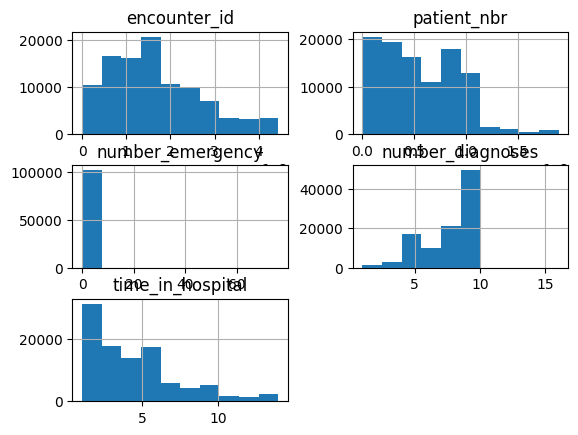

In [ ]:
df2.hist()

<Axes: >

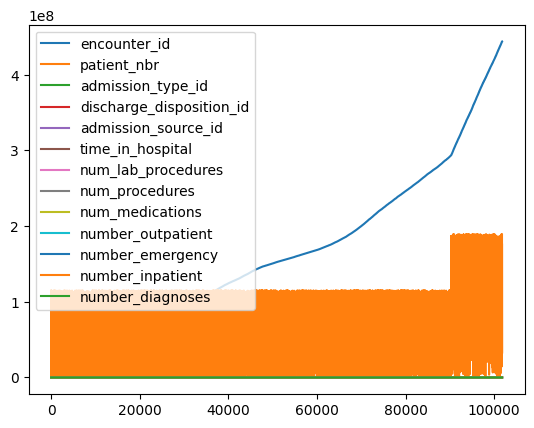

In [ ]:
df.plot()

<Axes: ylabel='Frequency'>

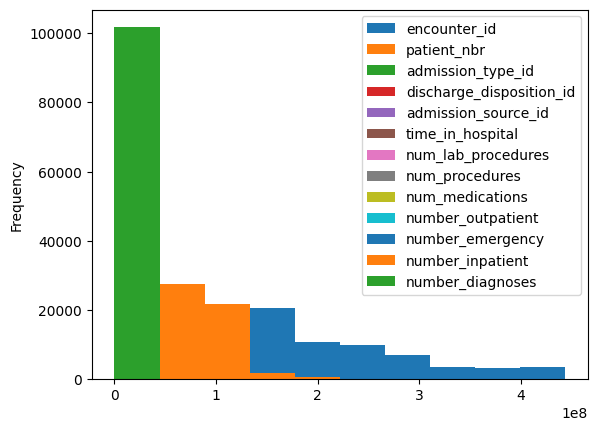

In [ ]:
df.plot(kind="hist")

<Axes: ylabel='Frequency'>

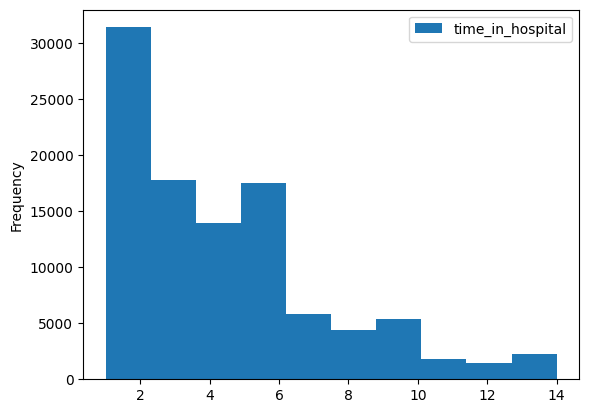

In [ ]:
df.plot(kind='hist', x='gender', y='time_in_hospital')